Laad modules

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go


Opdracht 1: Start een simpele voorspelling met de test dataset

In [2]:
# lees de test data met pandas
df = pd.read_csv('test.csv')

# voeg ee nieuwe kolom toe met de naam 'Survived' en vul deze met 0
df['Survived'] = 0

# selecteer de kolommen 'PassengerId' en 'Survived' en sla deze op in een nieuwe dataframe
df[['PassengerId', 'Survived']].to_csv('submission.csv', index=False)


Opdracht 2: Maak een voorspellend algoritm

In [3]:
# Laad de train.csv data in met pandas
df = pd.read_csv('train.csv')

df_test = pd.read_csv('test.csv')

Eerst wat informatie uit de dataframes halen

In [4]:
# print informatie over de numerieke kolommen in de train.csv data
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# print informatie over de numerieke kolommen in de test.csv data
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
# print datatype informatie van de kolommen in de train.csv data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
# print de null count van de kolommen
print('TRAIN DATA ====>')
print(df.isnull().sum())
print('')
print('TEST DATA ====>')
print(df_test.isnull().sum())

TRAIN DATA ====>
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

TEST DATA ====>
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Correlatie map voor beide dataframes

<Axes: >

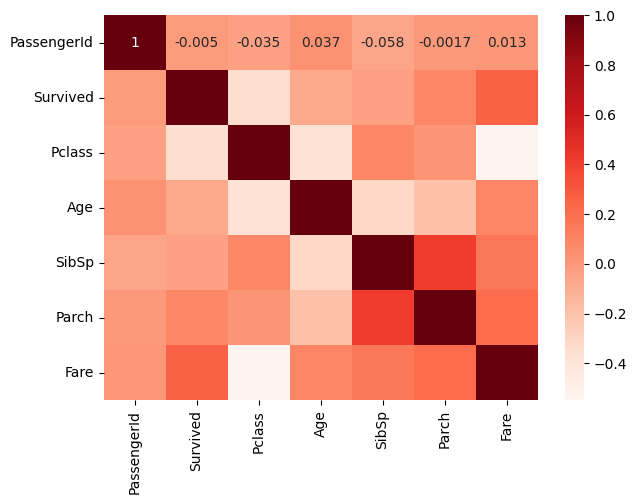

In [8]:
# Train dataset:
# Verwijder de kolommen die niet numeriek zijn
numeric_columns = df.select_dtypes(include=[np.number]).columns
m = df[numeric_columns].corr()

# maak een heatmap van de correlatie matrix
plt.figure(figsize=(7,5))
sns.heatmap(m, annot=True, cmap="Reds")
 

<Axes: >

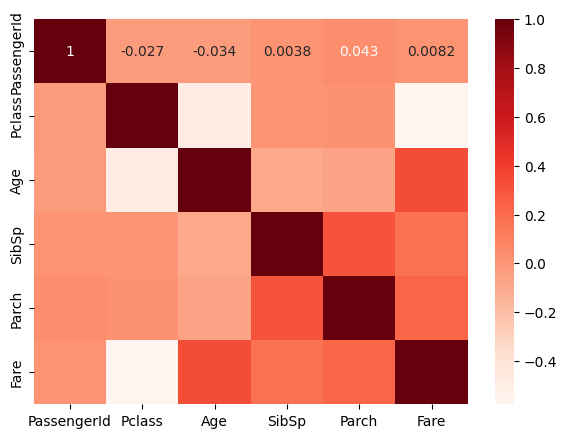

In [9]:
# Verwijder de kolommen die niet numeriek zijn
numeric_columns = df_test.select_dtypes(include=[np.number]).columns
m = df_test[numeric_columns].corr()

# maak een heatmap van de correlatie matrix
plt.figure(figsize=(7,5))
sns.heatmap(m, annot=True, cmap="Reds")

Age kolom verkennen

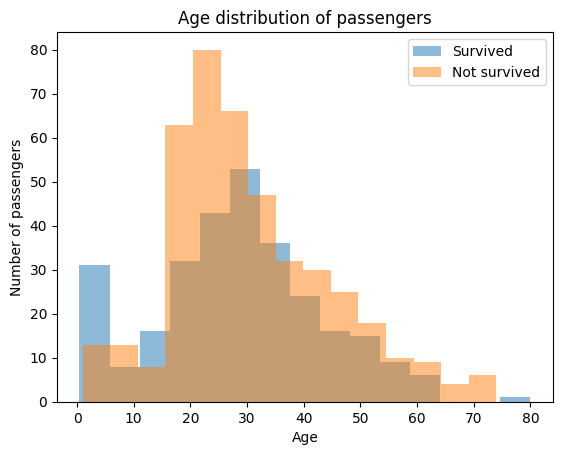

In [10]:
# Maak twee nieuwe data frames voor overlevenden en niet overlevenden
# zodat we deze makkelijk kunnen gebruiken voor visualisaties
df_survived = df[df['Survived'] == 1]
df_not_survived = df[df['Survived'] == 0]


# maak twee histogrammen van de leeftijden van overlevenden en niet overlevenden
plt.hist(df_survived['Age'], bins=15, alpha=0.5, label='Survived')
plt.hist(df_not_survived['Age'], bins=15, alpha=0.5, label='Not survived')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.title('Age distribution of passengers')
plt.legend()

plt.show()

In [11]:
print(df['Age'].head(10))

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64


In [12]:
# er zijn nog steeds missende waarden in de Age kolom
# we kunnen deze vervangen door de gemiddelde leeftijd van de passagiers te nemen
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

mean_age = df_test['Age'].mean()
df_test['Age'] = df_test['Age'].fillna(mean_age)


In [13]:
# groepeer de leeftijden in bins van 10 jaar
bins = [0, 18, 30, 40, 50, 60, 70, 80]
df['Age_group'] = pd.cut(df['Age'], bins)
df_test['Age_group'] = pd.cut(df_test['Age'], bins)

In [14]:
# print de Age_group kolom
print(df['Age_group'].value_counts())

(18, 30]    447
(30, 40]    155
(0, 18]     139
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: Age_group, dtype: int64


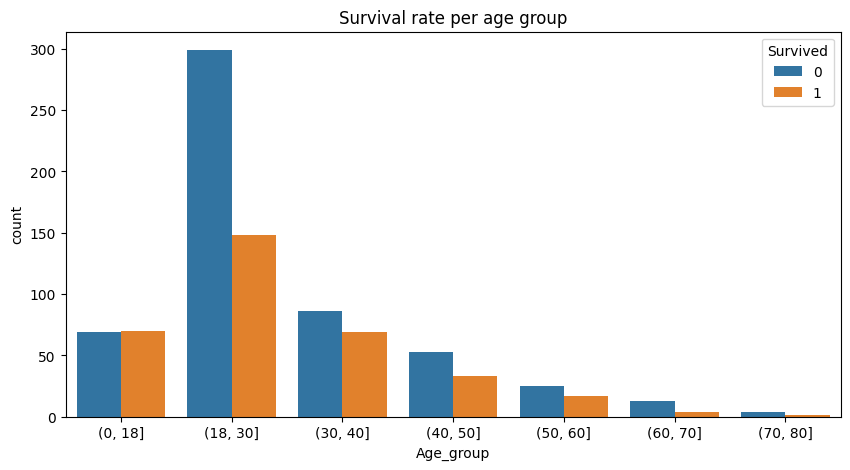

In [15]:
# maak plot van de overlevingskansen per leeftijdgroep
plt.figure(figsize=(10,5))

sns.countplot(x='Age_group', hue='Survived', data=df)
plt.title('Survival rate per age group')

plt.show()

Age: 0 t/m 18 is de enige leeftijdsgroep waarbij het percentage overlevende hoger is dan het percentage niet overlevende. Wat ook logisch is.
Om de data bruikbaar te maken voor het model hebben we de verschillende leeftijdsgroepen voorzien van een bin. De values zonder een waarde hebben het gemiddelde gekregen.

Fare kolom verkennen

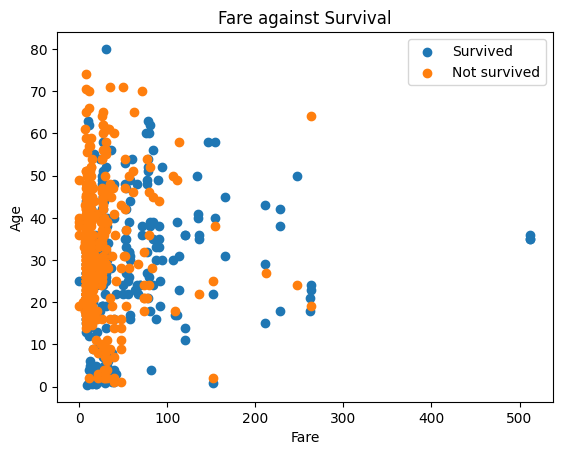

In [16]:
# maak subplot een scatter plot van de ticket prijs tegen de overlevenden en niet overlevenden
fig, ax = plt.subplots()
ax.scatter(df_survived['Fare'], df_survived['Age'], label='Survived')
ax.scatter(df_not_survived['Fare'], df_not_survived['Age'], label='Not survived')
ax.set_xlabel('Fare')
ax.set_ylabel('Age')
ax.set_title('Fare against Survival')
ax.legend()

plt.show()

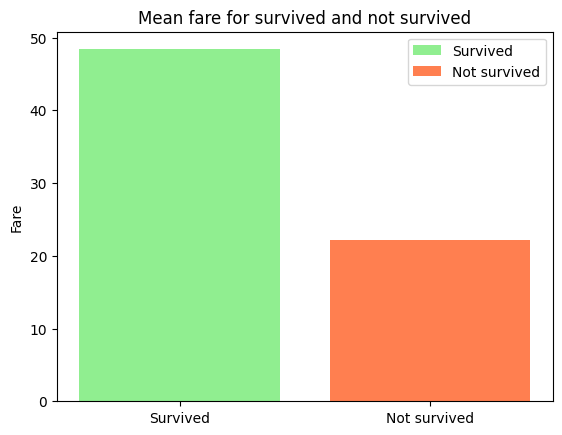

In [17]:
# maak een bar plot van de gemiddelde ticket prijs voor overlevenden en niet overlevenden
fig, ax = plt.subplots()
ax.bar('Survived', df_survived['Fare'].mean(), color='lightgreen', label='Survived')
ax.bar('Not survived', df_not_survived['Fare'].mean(), color='coral', label='Not survived')
ax.set_ylabel('Fare')
ax.set_title('Mean fare for survived and not survived')
ax.legend()

plt.show()


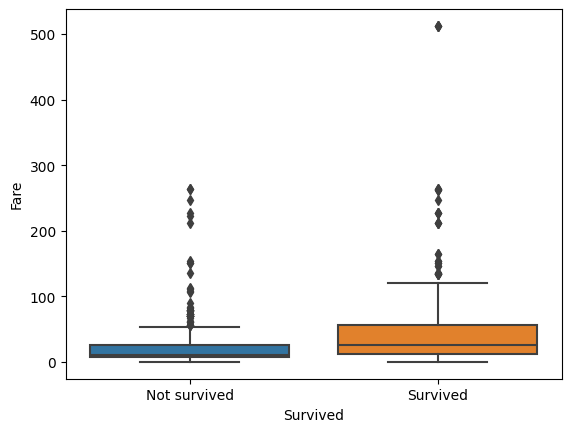

In [18]:
# maak een boxplot waarbij op de x-axis de overlevenden en niet overlevenden staan en op de y-axis de ticket prijs
sns.boxplot(x='Survived', y='Fare', data=df)

# vervang de x-as labels met 'Survived' en 'Not survived'
plt.xticks([0, 1], ['Not survived', 'Survived'])
plt.show()

In [19]:
# Kolom 'Fare' heeft 1 onbekende waarde in de test data, dus we vervangen deze door de gemiddelde waarde
mean_fare = df_test['Fare'].mean()
df_test['Fare'] = df_test['Fare'].fillna(mean_fare)

In [20]:
print(df['Fare'].isnull().sum())

0


In [21]:
# groepeer de ticket prijzen in bins. de max is 513
bins = [0, 5, 10, 15, 20, 25, 50, 100, 200, 300, 513]
df['Fare_group'] = pd.cut(df['Fare'], bins)
df_test['Fare_group'] = pd.cut(df_test['Fare'], bins)

In [22]:
# print alleen de non values in de Fare_group kolom
print(df_test['Fare_group'].isnull().sum())
print(df['Fare_group'].isnull().sum())

2
15


In [23]:
# Blijkbaar zijn er nu nog steeds missende waardes in de Fare_group kolom, dus we vullen deze in met de meest voorkomende waarde
df['Fare_group'] = df['Fare_group'].fillna(df['Fare_group'].mode()[0])
df_test['Fare_group'] = df_test['Fare_group'].fillna(df_test['Fare_group'].mode()[0])

# print de value counts van de Fare_group kolom
print(df['Fare_group'].value_counts())


(5, 10]       334
(25, 50]      174
(10, 15]      122
(50, 100]     107
(15, 20]       57
(20, 25]       42
(100, 200]     33
(200, 300]     17
(300, 513]      3
(0, 5]          2
Name: Fare_group, dtype: int64


In [24]:
# de meeste mensen hebben een ticket prijs tussen de 5 en 10. print hiervan de overlevingskans
print(df[df['Fare_group'] == pd.Interval(5, 10)]['Survived'].mean())

0.20059880239520958


In [25]:
# print nu de overlevingskans van de passagiers met een ticket prijs tussen de 50 en 100
print(df[df['Fare_group'] == pd.Interval(50, 100)]['Survived'].mean())

0.6542056074766355


Fare: Het is duidelijk te zien passagiers met een duurdere ticket een hogere overlevingskans hebben.
Als je alleen al kijkt naar de overlevingskans van de groep 5-10 en 50-100 zie je al een groot verschil in percentages. Er zijn hier ook bins gebruikt omdat er anders veel verschillende waardes zijn voor het ML model.


Kolom Cabin verkennen

In [26]:
# tel alle start letters van de cabin nummers van de passagiers die het overleeft hebben en drop de missende waardes
print(df[df['Survived'] == 1]['Cabin'].dropna().str[0].value_counts())

# tel alle start letters van de cabin nummers van de passagiers die het niet overleeft hebben en drop de missende waardes
print(df[df['Survived'] == 0]['Cabin'].dropna().str[0].value_counts())

C    35
B    35
D    25
E    24
F     8
A     7
G     2
Name: Cabin, dtype: int64
C    24
B    12
E     8
A     8
D     8
F     5
G     2
T     1
Name: Cabin, dtype: int64


In [27]:
# verwijder de 'Cabin' kolom, want deze bevat te veel missende waardes
df = df.drop('Cabin', axis=1)
df_test = df_test.drop('Cabin', axis=1)

Kolom Cabin heeft teveel Non values om mee te trainen dus die kolom gaan we verwijderen. Maar wat wel opvalt is dat de cabines die beginnen met de letter D en E een veel hogere overlevingskans hebben in vergelijking met de gesneuvelden.

Kollom Pclass verkennen

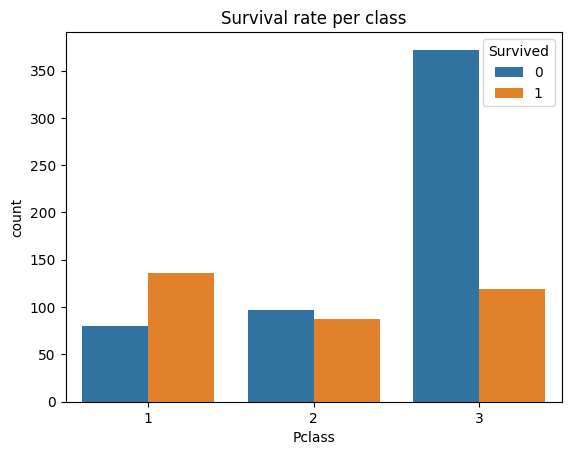

In [28]:
# maak een bar plot van de overlevingskansen per klasse
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival rate per class')

plt.show()


Pclass: De meeste mensen varen 3e klas. De 1e klas is de enige klasse waarbij het percentage overlevende hoger is in vergelijking met de overledenen.

Kolom SibSp verkennen

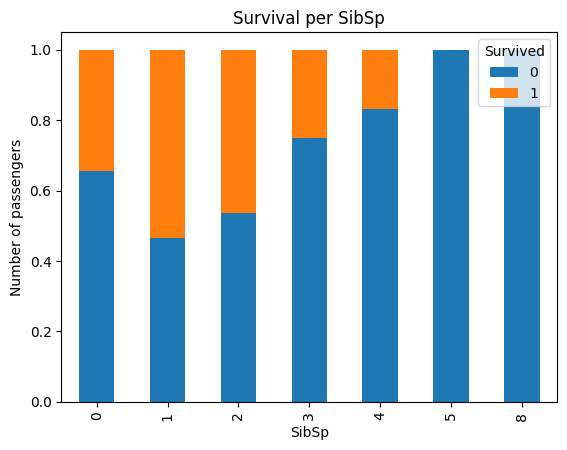

In [29]:
# maak een proportie plot van de overlevingskansen per SibSp     
df_sibsp = df.groupby(['SibSp', 'Survived']).size().unstack()
df_sibsp_normalized = df_sibsp.div(df_sibsp.sum(axis=1), axis=0)
df_sibsp_normalized.plot(kind='bar', stacked=True)
plt.ylabel('Number of passengers')
plt.title('Survival per SibSp')
plt.show()

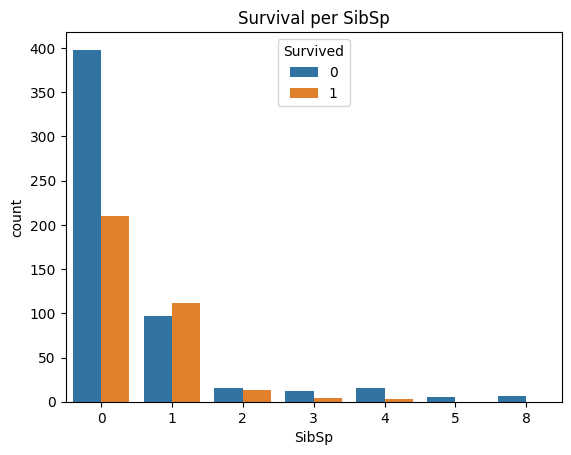

In [30]:
# overlevingskansen per SibSp
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title('Survival per SibSp')
plt.show()

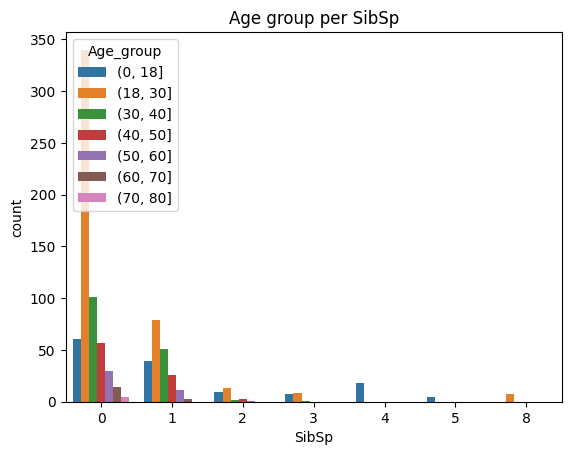

In [31]:
# leeftijdsgroep per SibSp
sns.countplot(x='SibSp', hue='Age_group', data=df)
plt.title('Age group per SibSp')
plt.show()

SibSp: Het is te zien dat er veel jongeren zijn die geen broertjes/zusjes hebben en geen huwelijkspartner hebben.


Kolom Parch verkennen:

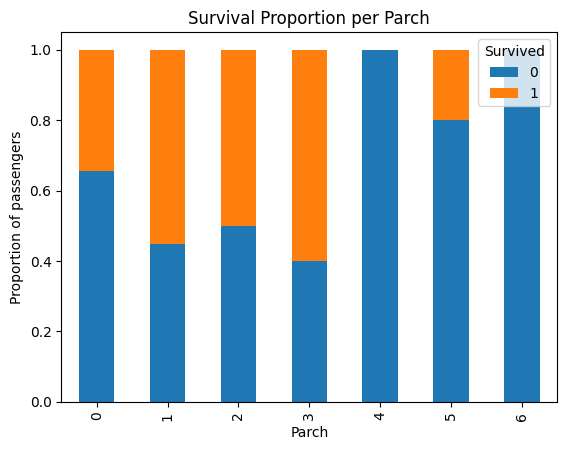

In [32]:
# maak een proportie plot van de overlevingskansen per Parch
df_parch = df.groupby(['Parch', 'Survived']).size().unstack()
df_parch_normalized = df_parch.div(df_parch.sum(axis=1), axis=0)  # Normalize by row

df_parch_normalized.plot(kind='bar', stacked=True)
plt.ylabel('Proportion of passengers')
plt.title('Survival Proportion per Parch')
plt.show()


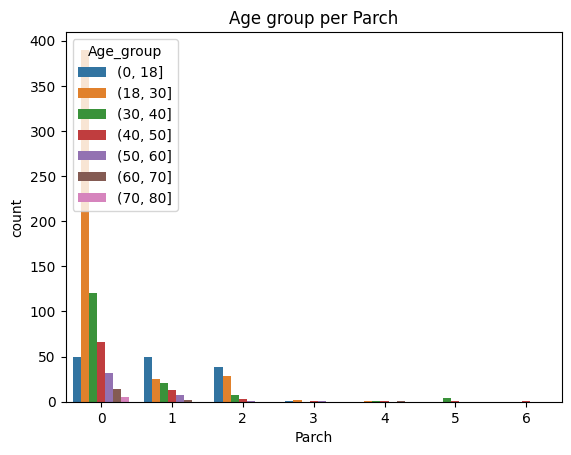

In [33]:
# leeftijdsgroep per Parch
sns.countplot(x='Parch', hue='Age_group', data=df)
plt.title('Age group per Parch')
plt.show()

Parch: Het is te zien dat de meeste jongeren geen kind of ouder hebben. Als je dan vergelijkt met SibSp, dan is te zien dat er veel jongeren alleen zijn. Dit is de grootste groep.
Als je kijkt naar de proportie plot dan valt het op dat vooral passagiers met meer dan 3 ouders of kinderen een lage overlevingskans hebben. Maar dit is ook maar een hele kleine groep.

Embarked:

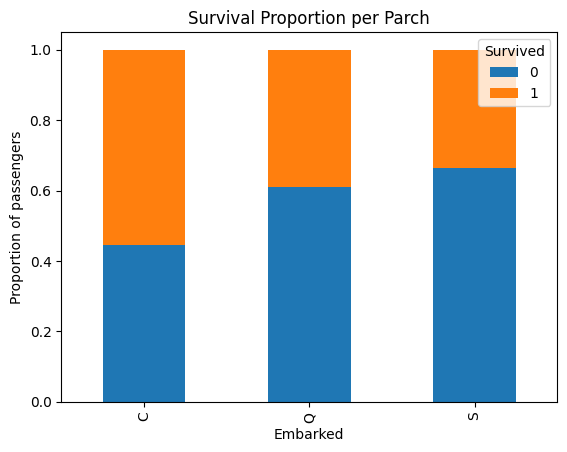

In [34]:
# maak een proportie plot van de overlevingskansen per opstapplaats
df_embarked = df.groupby(['Embarked', 'Survived']).size().unstack()
embarked_normalized = df_embarked.div(df_embarked.sum(axis=1), axis=0)  # Normalize by row

embarked_normalized.plot(kind='bar', stacked=True)
plt.ylabel('Proportion of passengers')
plt.title('Survival Proportion per Parch')
plt.show()

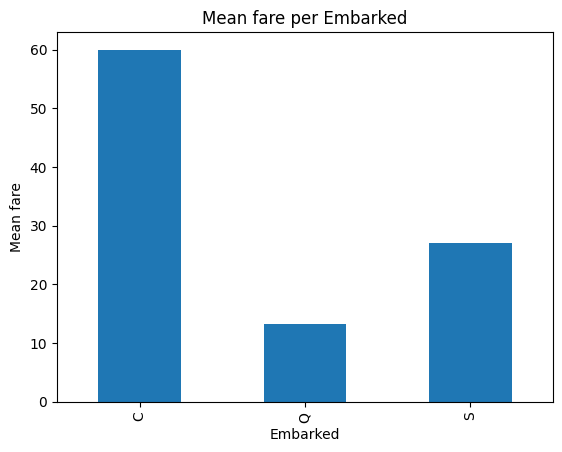

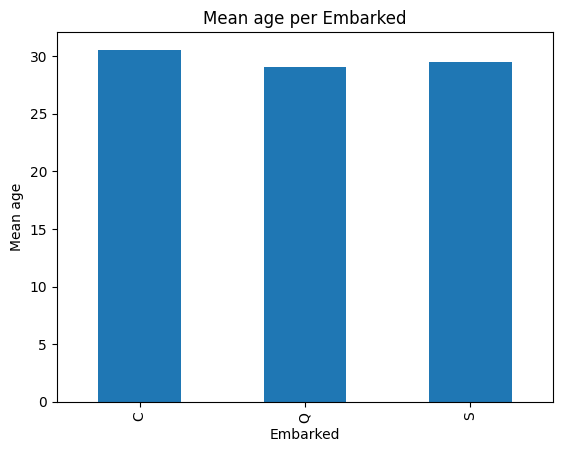

In [35]:
# maak een bar plot van de gemiddelde ticket prijs per vertrek locatie
df.groupby('Embarked')['Fare'].mean().plot(kind='bar')
plt.ylabel('Mean fare')
plt.title('Mean fare per Embarked')
plt.show()

# maak een bar plot van de gemiddelde leeftijd per vertrek locatie
df.groupby('Embarked')['Age'].mean().plot(kind='bar')
plt.ylabel('Mean age')
plt.title('Mean age per Embarked')
plt.show()

In [36]:
# er zijn twee missende waardes in de Test dataset. In 'Embarked'. Deze kolom is erg belangrijk voor de voorspelling.
# Omdat het er maar twee zijn voegen we de meest voorkomende waarde toe.
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
 11  Age_group    891 non-null    category
 12  Fare_group   891 non-null    category
dtypes: category(2), float64(2), int64(5), object(4)
memory usage: 79.3+ KB


Embarked: Als je In bent ingestapt bij C, dan heb je een hogere overlevings kans. dus zeker nuttig!

Sex:

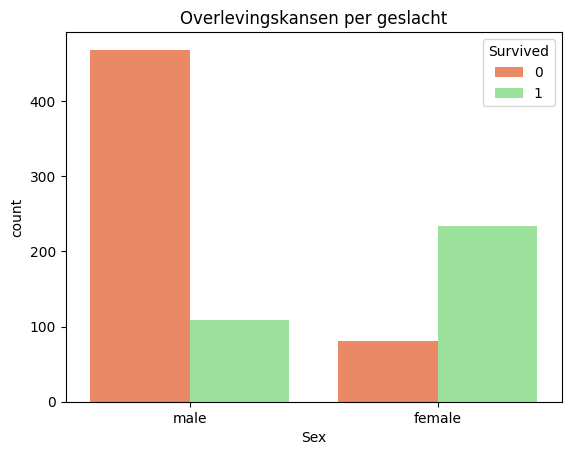

In [37]:

# groepeer de kolommen 'Sex' en 'Survived' en maak een sns bar plot, geef het de kleuren rood en groen
sns.countplot(x='Sex', hue='Survived', data=df, palette=['coral', 'lightgreen'])
plt.title('Overlevingskansen per geslacht')
plt.show()

een man heeft grote kans op de dood. Dus, deze data moeten we zeker gebruiken!

maak de data gereed voor gebruik

In [38]:
# print de eerste 5 rijen van de dataframe
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked Age_group Fare_group  
0      0         A/5 21171   7.2500        S  (18, 30]    (5, 10]  
1      0          PC 17599  71.2833        C  (30, 40]  (50, 100]  
2      0  STON/O2. 3101282   7.9250        S  (18, 30]    (5, 10]  
3      0            113803  53.1000        S  (3

In [39]:
# als het goed is zijn de non values al weg. maar voor de zekerheid checken we het nog een keer
print('TRAIN DATA ====>')
print(df.isnull().sum())
print('')
print('TEST DATA ====>')
print(df_test.isnull().sum())

TRAIN DATA ====>
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Age_group      0
Fare_group     0
dtype: int64

TEST DATA ====>
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Age_group      0
Fare_group     0
dtype: int64


In [40]:
from sklearn.ensemble import RandomForestClassifier

# Laad de datasets
train_data = df
test_data = df_test

# Definieer de target-variabele (y) en de features (X) uit de train-set
y = train_data["Survived"]

features = ['Sex', 'Fare_group', 'Age_group', 'Embarked', 'Pclass', 'SibSp', 'Parch']

# Gebruik get_dummies om categorische variabelen zoals 'Sex' om te zetten naar numeriek
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Bouw en train het model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y)

# Maak voorspellingen op basis van de test-set
predictions = model.predict(X_test)

# print de prediction scores
print(model.score(X_train, y))

# Maak een output DataFrame met PassengerId en de voorspelde Survived-waarden
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

0.8305274971941639


Sources:

Datacamp: https://app.datacamp.com/learn/assignments
kaggle: https://www.kaggle.com/code/alexisbcook/titanic-tutorial
chatgpt: https://chatgpt.com/
github: https://github.com/murilogustineli/Titanic-Classification/blob/main/Titanic%20Project.ipynb